In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import det, inv, matrix_rank, norm
import os


We assume the relationship between the input $ X \rightarrow f(X)$ is described by a linear combination

$ f(X_i) = X_iw + b,
\quad X = \begin{bmatrix}
x_{00} & ... & x_{0j} \\
\vdots & \vdots & \vdots \\
x_{i0} & ... & x_{ij}
\end{bmatrix},
\quad 
w = \begin{bmatrix}
w_{1} & ... w x_{j} \\
\end{bmatrix},
\quad f(X_i) \in \mathbb{R}
$

To remove the b and solely explain the relationship as a linear transformation we include the constant in $X$ and $w$

$ f(X_i) = X_iw + b,
\quad X = \begin{bmatrix}
1 & x_{00} & ... & x_{0j} \\
\vdots & \vdots & \vdots & \vdots \\
1 & x_{i0} & ... & x_{ij}
\end{bmatrix},
\quad 
w = \begin{bmatrix}
b & w_{1} & ... & w_{j} \\
\end{bmatrix},
\quad f(X_i) \in \mathbb{R}
$

We want to minimize the emperical risk: </br>
$ L = \frac{1}{i}\sum_{i} (Y - f(x))^{2} \Rightarrow \frac{1}{i}\sum_{i} (Y - Xw)^{2} \Rightarrow \frac{1}{i}||Y - Xw||^{2}$
 
 
Analytically we could solve this by taking the derivative of L and setting it to zero</br>
$\frac{\partial L}{\partial w} = \frac{2}{i}X^{T}(Y-Xw) = \frac{2}{i}(X^{T}Y-X^{T}Xw)$</br>
$\frac{\partial L}{\partial w} = 0 \quad \rightarrow w = (X^{T}X)^{-1}X^{T}Y$ </br>
This is solveable if $X^{T}X$ is full rank which is equivilant to $X$ being of full rank. Moreover this is the global minimum beacuse: $\frac{\partial^2 f}{\partial x^2} = X^TX$ and $det(X^TX) => 0$ impying the objective function is convex

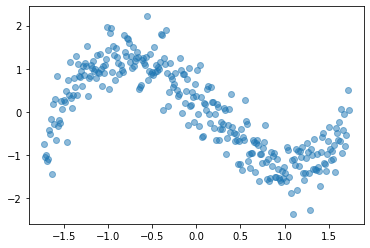

In [3]:
X = np.array([[i] for i in np.linspace(0,11,300)])
X = (X - X.mean()) / X.std()
Y = np.array([1 * (i - 5) ** 3 - 3*(i - 0.5) ** 2+ np.random.normal(i, 20, 1)  for i in np.linspace(0,11,300)]) 
Y = (Y - Y.mean()) / Y.std()

# Creating plot
fig, ax = plt.subplots()
ax.scatter(x=X, y=Y, alpha=0.5, marker='o');
plt.show();

In [8]:
k = 4
phi = lambda x : np.power(x, range(k))

The matrix A is of Rank: 4


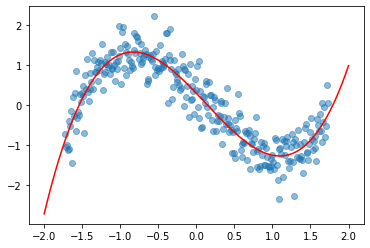

In [12]:
# Add intercept
A = phi(X)
# Solve for W
print("The matrix A is of Rank: %d" % matrix_rank(A))
w = (inv(A.T @ A) @ A.T @ Y).flatten()

# Plotting data
fig, ax = plt.subplots()
ax.scatter(x=X, y=Y, alpha=0.5, marker='o');
ax.plot(np.linspace(-2,2,100) , [phi(x) @ w for x in np.linspace(-2,2,100)], color='red');
plt.show();

In [13]:
w

array([ 0.29068772, -1.98536479, -0.29068772,  0.72795189])

This is superfluous as there exists an analytical solution. Nevertheless, let's try to solve the optimization problem using gradient descent.

Gradient descent is based on the observation that if the multi-variable function $F(w)$. $F(\mathbf{w})$ is defined and differentiable in a neighborhood of point $\mathbf{w_0}$ , then $F(\mathbf {w} )$ decreases fastest if one goes from a $\mathbf {w_0}$ in the direction of the negative gradient of $F(\mathbf{w})$ at ${\displaystyle \mathbf {w_0} ,-\nabla F(\mathbf {w_0} )}$. It follows that, if 

${\displaystyle \mathbf {w} _{n+1}=\mathbf {w} _{n}-\gamma \nabla F(\mathbf {w} _{n})}$

or a small enough step size or learning rate $ \displaystyle \gamma \in \mathbb {R} _{+}$, then ${\displaystyle F(\mathbf {w_{n}} )\geq F(\mathbf {w_{n+1}} )}$. In other words, the term ${\displaystyle \gamma \nabla F(\mathbf {w} )}$ is subtracted from a $\mathbf {w}$ because we want to move against the gradient, toward the local minimum


In our case:
$
\\ \frac{\partial L}{\partial u}\frac{\partial u}{\partial w} = \frac{-2}{i} X^T (Y - XW)
\\ \frac{\partial L}{\partial u}\frac{\partial u}{\partial w} = \frac{-2}{i}(Y - XW)
\\ \nabla F = [\frac{\partial L}{\partial u}\frac{\partial u}{\partial w}, \frac{\partial L}{\partial u}\frac{\partial u}{\partial w}]
\\ {\displaystyle \mathbf {w} _{n+1}=\mathbf {w} _{n} - \gamma \nabla F}$

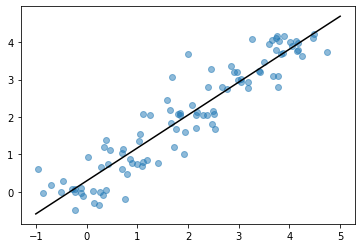

0.2871662251397057 [[0.88182686]]


In [263]:
### Numeric solution ###

np.random.seed(42)

# Define variables
X = (np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.5))[:, None]
Y = (np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.25))[:, None]

# Initiate weights
w = np.full((X.shape[1], 1), 5)
b = 0

# Set learning rate
gamma = 0.01
max_iteration = 1000
max_threshold = 0.01
samples = X.shape[0]

for i in range(max_iteration) : 
    error = Y - (X @ w + b)
    b_grad = np.sum(error)
    w_grad = X.T @ error
    w = w + 2 * gamma * w_grad/samples
    b = b + 2 * gamma * b_grad/samples
    magnitude = norm([w_grad, w_grad])
    if(magnitude < max_threshold): break

# Plotting data
xx = np.linspace(-1,5,100)
yy = np.array([ b + w[0][0] * e for e in xx])
fig, ax = plt.subplots()
ax.scatter(x=X, y=Y, alpha=0.5, marker='o');
ax.plot(xx, yy, alpha=1, color='black');
plt.show();
print(b,w)

array([[0.88182686],
       [0.28716623]])

In [209]:
import numpy as np

class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate, self.iterations = learning_rate, iterations
    
    def fit(self, X, y):
        b = 0
        m = 5
        n = X.shape[0]
        for _ in range(self.iterations):
            b_gradient = -2 * np.sum(y - m*X + b) / n
            m_gradient = -2 * np.sum(X*(y - (m*X + b))) / n
            b = b + (self.learning_rate * b_gradient)
            m = m - (self.learning_rate * m_gradient)
        self.m, self.b = m, b
        return m,b
        
    def predict(self, X):
        return self.m*X + self.b
    
np.random.seed(42)
X = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.5)
Y = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.25)
clf = GradientDescentLinearRegression()
t = clf.fit(X, Y)
print(t)

(0.99492950681644, -0.06737711529735597)


In [17]:
array([48.47790261,  0.11081279])

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [70]:
w2 = w1 + (gamma * (2/X.shape[0]) * (X.T @ (Y - X @ w1)))

In [72]:
w3 = w2 + (gamma * (2/X.shape[0]) * (X.T @ (Y - X @ w2)))

In [74]:
(X.T @ (Y - X @ w2))

array([[3.16812006e+13],
       [1.88774735e+11]])